# FRF_Currituck Sound All Station: Vertical Diffuse Attenuation Coefficient for Downwelling Photosynthetic Radiance EDA


python netcdf4 documentation: http://unidata.github.io/netcdf4-python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4
import time
import datetime

import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
graphics_path='/Users/paulp/GoogleDrive/projects/CurrituckSnd/plot_graphics/'

In [3]:
data_path='/Users/paulp/GoogleDrive/projects/CurrituckSnd/CS_Stations/'

CS01_Kd=pd.read_csv(data_path+'CS01/FRF_CS01_Kd.csv')
CS02_Kd=pd.read_csv(data_path+'CS02/FRF_CS02_Kd.csv')
CS03_Kd=pd.read_csv(data_path+'CS03/FRF_CS03_Kd.csv')

## Set date time values to Python datetime types, and round to nearest 1 second, on UT coordinated...
CS01_Kd['datetime'] = pd.to_datetime(CS01_Kd['datetime'], utc=True).dt.round('1s')
CS02_Kd['datetime'] = pd.to_datetime(CS02_Kd['datetime'], utc=True).dt.round('1s')
CS03_Kd['datetime'] = pd.to_datetime(CS03_Kd['datetime'], utc=True).dt.round('1s')

## Assign datetime field to data frame index
CS01_Kd.set_index('datetime', inplace=True)
CS02_Kd.set_index('datetime', inplace=True)
CS03_Kd.set_index('datetime', inplace=True)

## Aggregate sensor record indices in each of the three dataframes to the full day
CS01_Kd=CS01_Kd.resample('D').mean().copy()
CS02_Kd=CS02_Kd.resample('D').mean().copy()
CS03_Kd=CS03_Kd.resample('D').mean().copy()

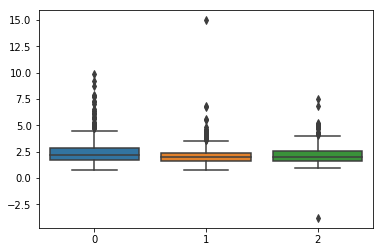

In [4]:
sns.boxplot(data=[CS01_Kd, CS02_Kd, CS03_Kd])

In [21]:
## drop the less tha 0 value in the Station 03 data:
CS03_Kd['PAR_Kd']=CS03_Kd[CS03_Kd['PAR_Kd'] >= 0]
CS03_Kd.describe()

,PAR_Kd
count,328.000000
mean,2.205694
std,0.885856
min,0.985465
25%,1.609755
50%,1.993414
75%,2.576600
max,7.538827


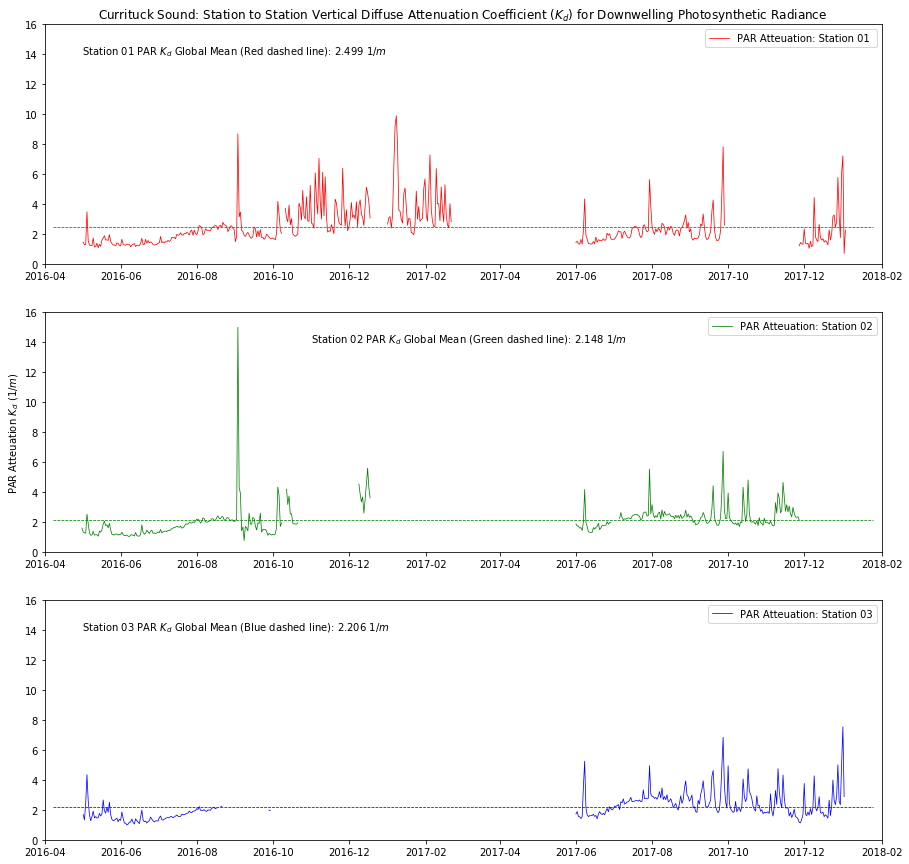

In [31]:
fig0=plt.figure(figsize=(15,15))
#fig0.tight_layout(pad=30)
# plt.subplots(figsize=(10,10))
ax01=fig0.add_subplot(3,1,1)
ax01.plot(CS01_Kd.index, CS01_Kd['PAR_Kd'], 'r-', linewidth=0.75, label='PAR Atteuation: Station 01 ' )
ax01.axhline(CS01_Kd['PAR_Kd'].mean(), 0.01,0.99, linewidth=0.75, linestyle='--', c='r' )
ax01.set_xlim('2016-04','2018-02')
ax01.set_ylim(0,16)
ax01.set_title('Currituck Sound: Station to Station Vertical Diffuse Attenuation Coefficient ($K_d$) for Downwelling Photosynthetic Radiance')
s='Station 01 PAR $K_d$ Global Mean (Red dashed line): '+str(round(CS01_Kd['PAR_Kd'].mean(),3 ))+' $1/{m}$'
ax01.text('2016-05', 14, s)
ax01.legend()

ax02=fig0.add_subplot(3,1,2)
ax02.plot(CS02_Kd.index, CS02_Kd['PAR_Kd'], 'g-', linewidth=0.75, label='PAR Atteuation: Station 02')
ax02.axhline(CS02_Kd['PAR_Kd'].mean(), 0.01,0.99, linewidth=0.75, linestyle='--', c='g' )
ax02.set_xlim('2016-04','2018-02')
ax02.set_ylim(0,16)
s='Station 02 PAR $K_d$ Global Mean (Green dashed line): '+str(round(CS02_Kd['PAR_Kd'].mean(),3 ))+' $1/{m}$'
ax02.text('2016-11', 14, s)
ax02.set_ylabel('PAR Atteuation $K_d$ ($1 /m$)')
ax02.legend()

ax03=fig0.add_subplot(3,1,3)
ax03.plot(CS03_Kd.index, CS03_Kd['PAR_Kd'], 'b', linewidth=0.75, label='PAR Atteuation: Station 03')
ax03.axhline(CS03_Kd['PAR_Kd'].mean(), 0.01,0.99, linewidth=0.75, linestyle='--', c='b' )
ax03.set_xlim('2016-04','2018-02')
ax03.set_ylim(0,16)
s='Station 03 PAR $K_d$ Global Mean (Blue dashed line): '+str(round(CS03_Kd['PAR_Kd'].mean(),3 ))+' $1/{m}$'
ax03.text('2016-05', 14, s)
ax03.legend()

#plt.tick_params(axis='x', rotation=45)
#sns.despine(offset=10, trim=True)
CS01_Kd['PAR_Kd'].mean()
plt.savefig(graphics_path+'PAR_Distribution_per_Station.pdf')

### Precipitation:

and its influence and associations with salinity, turbidity, fDOM, and $Chl_a$

In [118]:
url_base='https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/meteorology/weather/rain/'
    
#'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/meteorology/weather/rain/rain.ncml'
#    
#urls=['rain.ncml']
                                                          ## precip   'rain.ncml'
years=[2016,2017,2018]
months=['01','02','03','04','05','06','07','08','09','10','11','12']
prefix='FRF-met_weather_rain_'
suffix='.nc'



for var in nc.variables:
    print(var, np.shape(nc.variables[var]))

for year in years:
    for month in months:
        try:
            nc=netCDF4.Dataset(url_base+str(year)+'/'+prefix+str(year)+month+suffix)
            times=nc.variables['time']

            csdict={
                'rainfall' : nc.variables['rain']
                }
            dt = netCDF4.num2date(times[:],times.units)
            df = pd.DataFrame(csdict, index=dt)
        
            df.to_csv(prefix+str(year)+month+'.csv')  
        except:
            print('Oops! '+prefix+str(year)+month+suffix)


time (4334,)
lat ()
lon ()
sensorID (4334,)
rain (4334,)
qcFlag (4334,)


/anaconda3/lib/python3.6/site-packages/pandas/core/dtypes/cast.py:895: UserWarning: Warning: converting a masked element to nan.
  v = np.array(v, copy=False)
/anaconda3/lib/python3.6/site-packages/pandas/core/dtypes/cast.py:895: UserWarning: Warning: converting a masked element to nan.
  v = np.array(v, copy=False)


OSError: [Errno -90] NetCDF: file not found: b'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/meteorology/weather/rain/2018/FRF-met_weather_rain_201809.nc'

In [121]:
prefix+str(year)+month+suffix

'FRF__rain_201812_ALL.csv'

In [122]:
# read and combine all the individual rainfall by month files and load into df
data_path='/Users/paulp/GoogleDrive/projects/CurrituckSnd/'

prefix='FRF-met_weather_rain_'
suffix='.csv'
years=['2016','2017','2018']
months=['01','02','03','04','05','06','07','08','09','10','11','12']

ofp=open(data_path+'FRF_Precip_All.csv', 'a' )
ofp.write('datetime'+','+'rainfall\n')

for year in years:
    for month in months:
        try:
            ifp = open(data_path+prefix+str(year)+month+suffix, 'r')
            line = ifp.read()
            
            ofp.write(line)
            ifp.close()
        except:
            print('Oops!', prefix+str(year)+month+suffix)
ofp.close()

#df_rain['datetime']=pd.to_datetime( df_rain['datetime'], utc=True).dt.round('1s')
#df_rain.set_index('datetime', inplace=True)
#df_rain=df_rain.resample('D').mean().copy()

Oops! FRF-met_weather_rain_201809.csv
Oops! FRF-met_weather_rain_201810.csv
Oops! FRF-met_weather_rain_201811.csv
Oops! FRF-met_weather_rain_201812.csv


In [111]:
s

',rainfall\n2018-02-01 00:00:00.000000'

In [38]:
data_path='/Users/paulp/GoogleDrive/projects/CurrituckSnd/CS_Stations/'

station='CS03'

CS_Kd=pd.read_csv(data_path+station+'/FRF_'+station+'_Kd.csv', na_values=-999.99).drop(['dt'], axis=1)
CS_Rain=pd.read_csv(data_path+'FRF_Precip_All.csv', na_values=-999.99)
CS_WQ=pd.read_csv(data_path+station+'/FRF_'+station+'-EXO_ALL.csv', na_values=-999.990).drop(['gaugeDepth'], axis=1)
CS_WV=pd.read_csv(data_path+station+'/FRF_'+station+'-SBE26_Waves_ALL.csv', na_values=-999.990).drop(['depth','wavePeakFrequency'], axis=1)
CS_WC=pd.read_csv(data_path+station+'/FRF_'+station+'-ADOP_Currents_ALL.csv', na_values=-999.990).drop(['aveE','aveN','currentDirection','meanPressure'], axis=1)

## Set date time values to Python datetime types, and round to nearest 1 second, on UT coordinated...
CS_Kd['datetime'] = pd.to_datetime(CS_Kd['datetime'], utc=True).dt.round('1s')
CS_Rain['datetime'] = pd.to_datetime(CS_Rain['datetime'], utc=True).dt.round('1s')
CS_WQ['datetime'] = pd.to_datetime(CS_WQ['datetime'], utc=True).dt.round('1s')
CS_WV['datetime'] = pd.to_datetime(CS_WV['datetime'], utc=True).dt.round('1s')
CS_WC['datetime'] = pd.to_datetime(CS_WC['datetime'], utc=True).dt.round('1s')


## Assign datetime field to data frame index
CS_Kd.set_index('datetime', inplace=True)
CS_Rain.set_index('datetime', inplace=True)
CS_WQ.set_index('datetime', inplace=True)
CS_WV.set_index('datetime', inplace=True)
CS_WC.set_index('datetime', inplace=True)

## Aggregate sensor record indices in each of the three dataframes to the full day
CS_Kd=CS_Kd.resample('D').mean().copy()
#CS_Rain=CS_Rain.resample('D').sum().copy()
CS_WQ=CS_WQ.resample('D').mean().copy()
CS_WV=CS_WV.resample('D').mean().copy()
CS_WC=CS_WC.resample('D').mean().copy()

## for CS01 and others where outliers are detected and their removal desired...(note, if the outlying data does not exist then this step in the 
## process will do nothing.)
CS_WQ=CS_WQ[ CS_WQ['turbidity'] < 200 ]

CS=pd.concat([CS_Kd, CS_Rain, CS_WQ, CS_WV, CS_WC], axis=1)  #CS_Rain,

FileNotFoundError: File b'/Users/paulp/GoogleDrive/projects/CurrituckSnd/CS_Stations/CS03/FRF_CS03-EXO_ALL.csv' does not exist

In [139]:
CSr=CS_Rain.resample('D').sum()
#plt.plot(CSr.index, CSr['rainfall'])
#plt.tick_params(axis='x', rotation=45)
CSr.describe()

,rainfall
count,790.000000
mean,7.410865
std,78.238656
min,0.000000
25%,0.000000
50%,0.000000
75%,0.341924
max,1771.349074


In [36]:
CS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112343 entries, 2016-01-01 00:00:00+00:00 to 2018-02-28 23:50:00+00:00
Data columns (total 13 columns):
PAR_Kd            356 non-null float64
rainfall          112332 non-null float64
water_temp        476 non-null float64
salinity          476 non-null float64
pH                476 non-null float64
turbidity         476 non-null float64
chlorophyll       476 non-null float64
DOsat             476 non-null float64
DOmass            476 non-null float64
blueGreenAlgae    476 non-null float64
fDOM              382 non-null float64
waveHs            582 non-null float64
currentSpeed      645 non-null float64
dtypes: float64(13)
memory usage: 12.0 MB


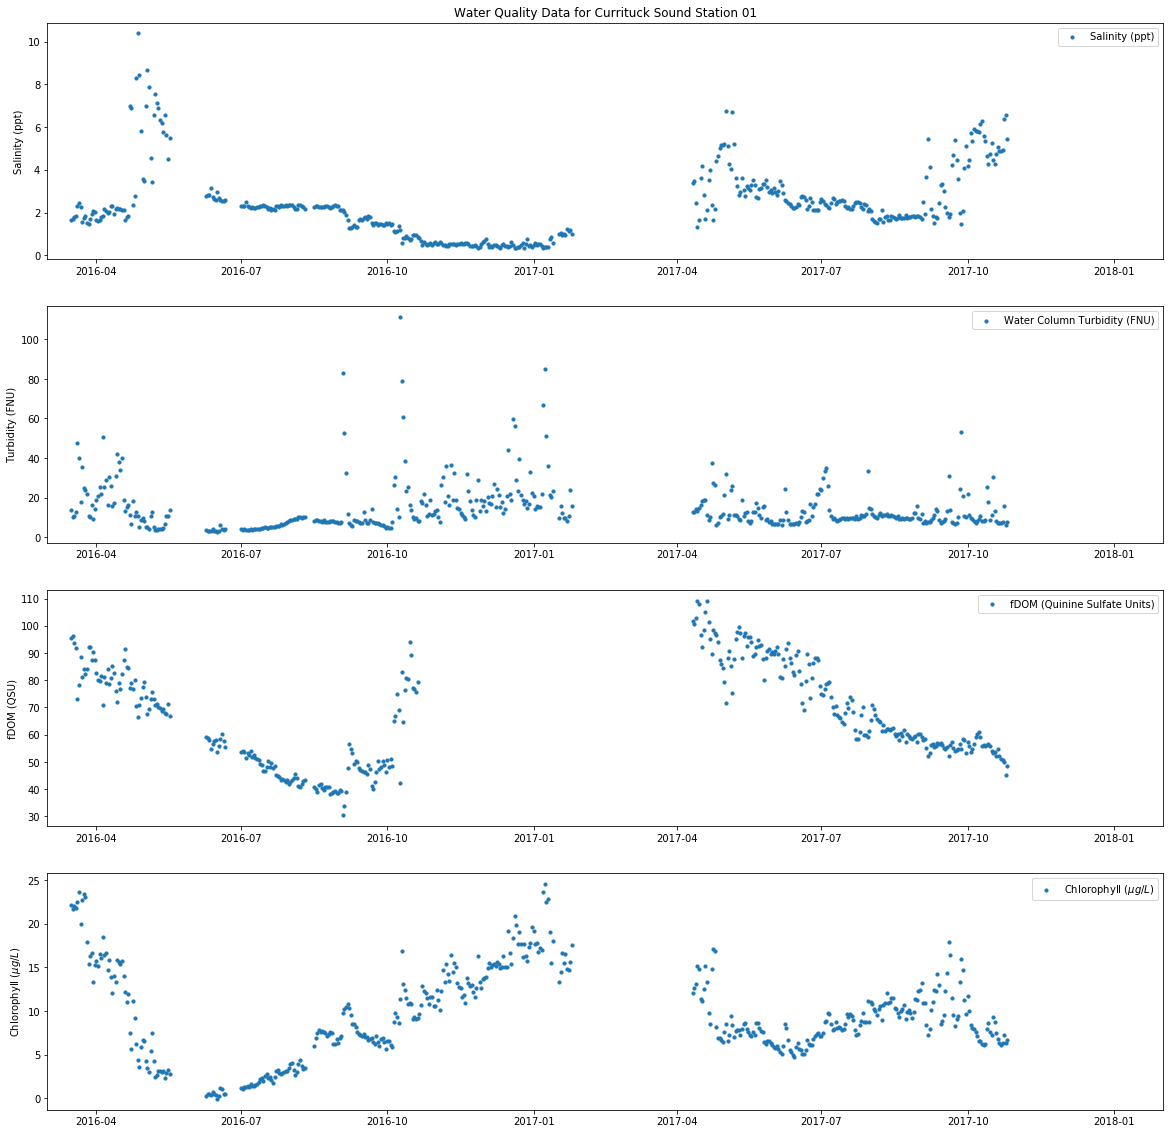

In [37]:
fig1 = plt.figure(figsize=(20,20))

ax10=fig1.add_subplot(4,1,1)
ax10.scatter(CS.index, CS['salinity'], s=10, label='Salinity (ppt)')
ax10.set_xlim('2016-03','2018-02')
plt.ylabel('Salinity (ppt)')
ax10.legend()
ax10.set_title('Water Quality Data for Currituck Sound Station 01')

#ax11=fig1.add_subplot(4,1,2)
#ax11.plot(CS.index, CS['rainfall'], label='10-minute Avg Total Rainfall (mm)')
#ax11.set_xlim('2016-03','2018-02')
#plt.ylabel('Rainfall (mm)')
#ax11.legend()

ax12=fig1.add_subplot(4,1,2)
ax12.scatter(CS.index, CS['turbidity'], s=10, label='Water Column Turbidity (FNU)')
ax12.set_xlim('2016-03','2018-02')
plt.ylabel('Turbidity (FNU)')
ax12.legend()

ax13=fig1.add_subplot(4,1,3)
ax13.scatter(CS.index, CS['fDOM'], s=10, label='fDOM (Quinine Sulfate Units)')
ax13.set_xlim('2016-03', '2018-02')
ax13.set_ylabel('fDOM (QSU)')
ax13.legend()

ax14=fig1.add_subplot(4,1,4)
ax14.scatter(CS.index, CS['chlorophyll'], s=10, label='Chlorophyll ($\mu g/L$)')
ax14.set_xlim('2016-03','2018-02')
ax14.set_ylabel('Chlorophyll ($\mu g/L$)')
ax14.legend()

fig1.savefig(graphics_path+'Water_Quality_Comps_'+station+'.pdf')

In [105]:
CS.head()

,PAR_Kd,rainfall,water_temp,salinity,pH,turbidity,chlorophyll,DOsat,DOmass,blueGreenAlgae,fDOM,waveHs,currentSpeed
datetime,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02 00:00:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03 00:00:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04 00:00:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pd.__version__

'0.23.4'

### Rainfall - Monthly Totals from the FRF:

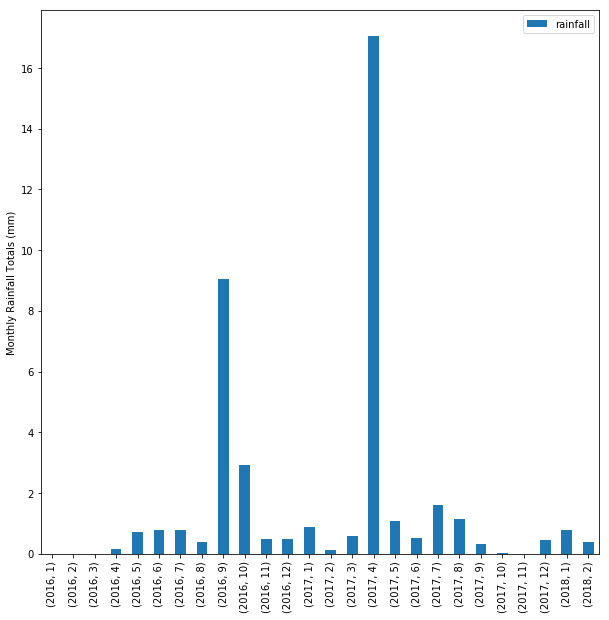

In [33]:
pt_rain = pd.pivot_table(CS, index=[CS.index.year.rename('year'), CS.index.month.rename('month')], values='rainfall', aggfunc='sum')
#pt_rain
#df.groupby([df.date.dt.month.rename('month'), df.date.dt.day.rename('day')])['vals'].sum()
pt_rain.plot(kind='bar', figsize=(10,10))
plt.ylabel('Monthly Rainfall Totals (mm)')
plt.xlabel('')
pt_rain.to_csv(graphics_path+'monthly_rainfall_totals.csv')
#plt.savefig(graphics_path+'monthly_rainfall_totals.pdf')

### Monthy Rainfall Data from the National Weather Service:

In [93]:
d2016={'year':2016,'01':2.91, '02':4.68, '03':2.22, '04':4.04,'05':4.36,'06':2.90,'07':3.26,'08':3.14,'09':12.03,'10':10.28,'11':1.62,'12':2.67}
d2017={'year':2017,'01':3.69, '02':0.92, '03':3.79, '04':2.52,'05':6.05,'06':3.42,'07':8.74,'08':6.01,'09':2.42,'10':3.06,'11':0.98,'12':3.06}
d2018={'year':2018,'01':3.90, '02':2.74, '03':4.42}

df2016=pd.DataFrame(d2016, index=range(0,1) )
df2017=pd.DataFrame(d2017, index=range(0,1))
df2018=pd.DataFrame(d2018, index=range(0,1))

EC_Rain=pd.concat([df2016,df2017,df2018])
EC_Rain.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','year']
EC_Rain.set_index('year', drop=True, inplace=True)

EC_Rain.T.sum()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


year
2016    54.11
2017    44.66
2018    11.06
dtype: float64

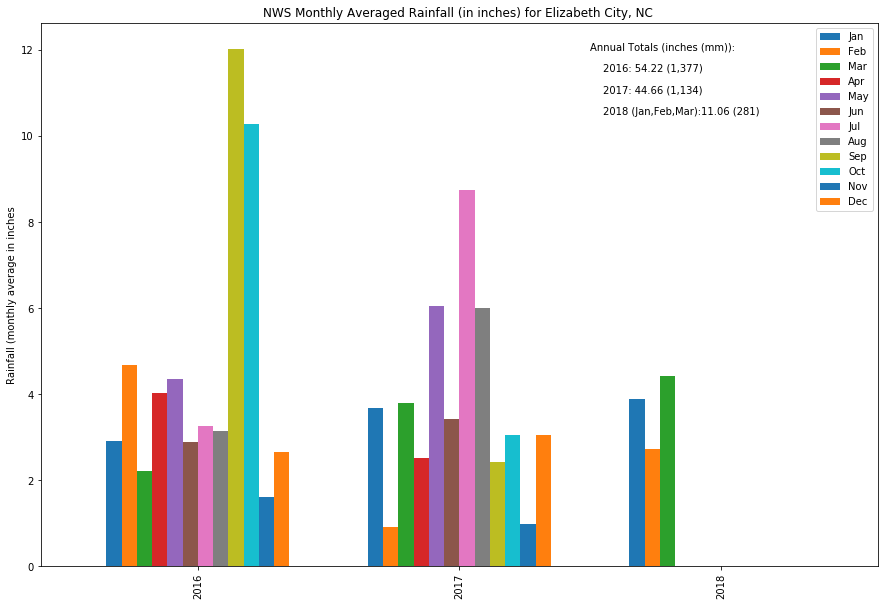

In [103]:
EC_Rain.plot(kind='bar', figsize=(15,10), width=0.7,table=False, title='NWS Monthly Averaged Rainfall (in inches) for Elizabeth City, NC ')
plt.ylabel('Rainfall (monthly average in inches')
plt.xlabel('')
plt.text(1.5, 12, 'Annual Totals (inches (mm)):')
plt.text(1.55, 11.5, '2016: 54.22 (1,377)')
plt.text(1.55, 11, '2017: 44.66 (1,134)')
plt.text(1.55, 10.5, '2018 (Jan,Feb,Mar):11.06 (281)')
plt.savefig(graphics_path+'NWS_EC_rainfall.pdf')

In [104]:
fig2=plt.figure(figsize=(15,15))

ax20=fig2.add_subplot(3,1,1)
ax20.plot(EC_Rain.index, EC_Rain)

<Figure size 1080x1080 with 0 Axes>

#### The diffusion coefficient (Kd) 

If $K_d$ is computed as (Lambert-Beer):  $K_d={1 \over{z2-z1}} \ln({E_d(z_1) \over{E_d(z_2)} })$

### Downwelling Diffuse Radiation Attenuation Coefficient - $K_d$ - OLS _Exploratory_ Regression Plots

and its relationship to [assumed] controlling factors: surface waves, unidirectional currents, fDOM, Turbidity, and Chl-a 

$K_{d_{total}} = K_{d_{H_2O}} + K_{d_{fDOM}} + K_{d_{Chi-a}} + K_{d_{turbidity}}$

where: <br>
$K_{d_{H_2O}}$ is the optical density of water (not considered here) <br>
$K_{d_{fDOM}}$ is the contribution to $K_{d_{total}}$ from non-algal organic particulates <br>
$K_{d_{Chl-a}}$ is the contribution to $K_{d_{total}}$ from Chlorophyll-a (phytoplankton proxy)<br>
$K_{d_{turbidity}}$ is the contribution to $K_{d_{total}}$ from measured water column turbidity (total suspended inorganic particles)<br>


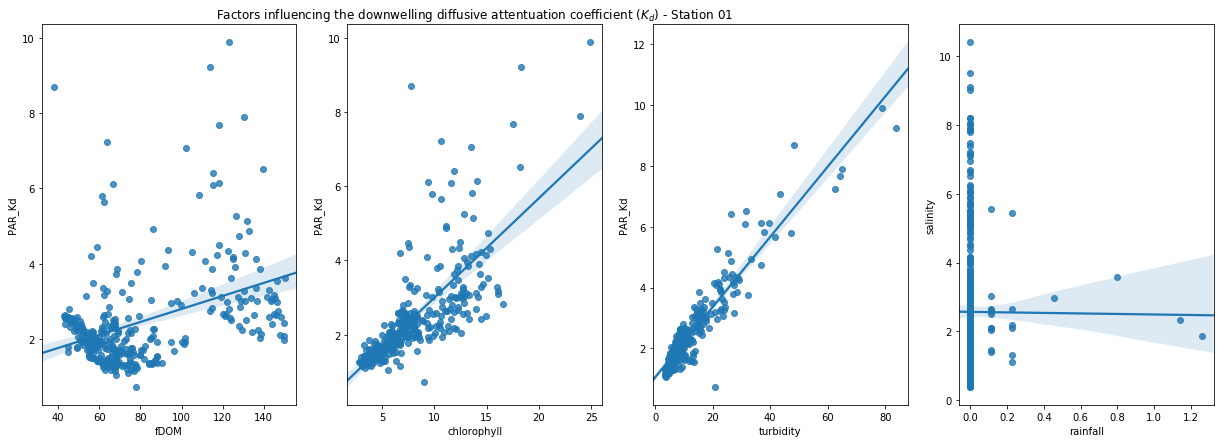

In [14]:
fig2=plt.figure(figsize=(21,7))
sns.regplot(x='fDOM', y='PAR_Kd', data=CS, fit_reg=True, order=1, ax=fig2.add_subplot(1,4,1))
sns.regplot(x='chlorophyll', y='PAR_Kd', data=CS, fit_reg=True, order=1, ax=fig2.add_subplot(1,4,2))

plt.title('Factors influencing the downwelling diffusive attentuation coefficient ($K_d$) - Station 01')

sns.regplot(x='turbidity', y='PAR_Kd', data=CS, fit_reg=True, order=1, ax=fig2.add_subplot(1,4,3))
sns.regplot(x='rainfall', y='salinity', data=CS, fit_reg=True, order=1, ax=fig2.add_subplot(1,4,4))
fig2.savefig(graphics_path+'compare_plots.pdf')

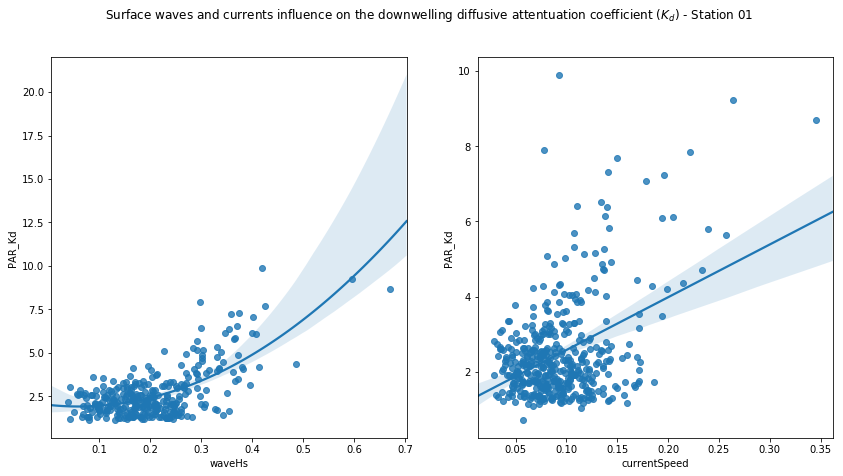

In [20]:
fig3=plt.figure(figsize=(14,7))

sns.regplot(x='waveHs', y='PAR_Kd', data=CS, order=2, ax=fig3.add_subplot(1,2,1))

sns.regplot(x='currentSpeed', y='PAR_Kd', data=CS, order=1, ax=fig3.add_subplot(1,2,2))
fig3.suptitle('Surface waves and currents influence on the downwelling diffusive attentuation coefficient ($K_d$) - Station 01')


fig3.savefig(graphics_path+'wave_currents_PAR_plots.pdf')

#### What if we could somehow remove the high-wind and storm wave effect from the data? 
#### How much might this attempt to isolate "typical" conditions impact results?

The 75th quantile for the significant wave height is 0.289935 m. So, 75% of the waves recorded at Station 01 are < 0.29 m. Though arbitrary, what if we assume (for now) that this 75% condition marks the upper boundary of "typical" wave energy conditions on Currituck Sound?

In [15]:
CS01=CS01[CS01['waveHs'] < 0.29 ]

,PAR_Kd,fDOM,chlorophyll,turbidity
PAR_Kd,1.000000,0.517252,0.815081,0.885150
fDOM,0.517252,1.000000,0.643632,0.467342
chlorophyll,0.815081,0.643632,1.000000,0.714684
turbidity,0.885150,0.467342,0.714684,1.000000


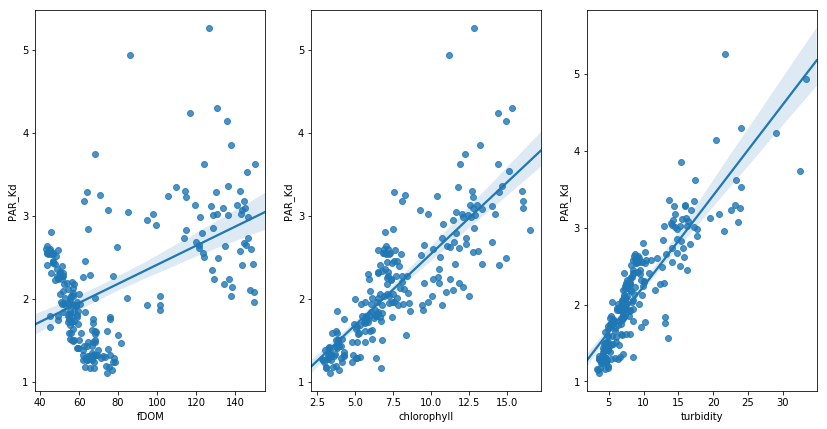

In [16]:
fig4=plt.figure(figsize=(14,7))
sns.regplot(x='fDOM', y='PAR_Kd', data=CS01, fit_reg=True, order=1, ax=fig4.add_subplot(1,3,1))
sns.regplot(x='chlorophyll', y='PAR_Kd', data=CS01, fit_reg=True, order=1, ax=fig4.add_subplot(1,3,2))
sns.regplot(x='turbidity', y='PAR_Kd', data=CS01, fit_reg=True, order=1, ax=fig4.add_subplot(1,3,3))

CS01[['PAR_Kd', 'fDOM','chlorophyll', 'turbidity']].corr()

,PAR_Kd,waveHs,currentSpeed
PAR_Kd,1.000000,0.150150,-0.113817
waveHs,0.150150,1.000000,0.544345
currentSpeed,-0.113817,0.544345,1.000000


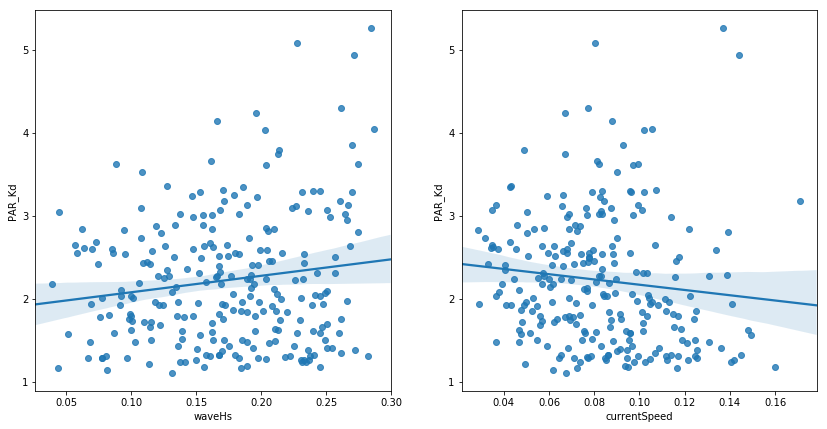

In [17]:
fig5=plt.figure(figsize=(14,7))

sns.regplot(x='waveHs', y='PAR_Kd', data=CS01, ax=fig5.add_subplot(1,2,1))
sns.regplot(x='currentSpeed', y='PAR_Kd', data=CS01, order=1, ax=fig5.add_subplot(1,2,2))

CS01[['PAR_Kd','waveHs','currentSpeed']].corr()

### Multiple Regression Experiment:

Rebuild the CS01 dataframe to include all records...

In [36]:
CS01=pd.concat([CS01_WQ, CS01_WV, CS01_WC, CS01_Kd],axis=1)

In [31]:
#Instantiate the regression model and setting parameters if any,
reg_model = LinearRegression(normalize=True)

R=CS01[['fDOM','chlorophyll','turbidity','waveHs','currentSpeed','PAR_Kd']].dropna()
X=R[['fDOM','chlorophyll','turbidity','waveHs','currentSpeed']]
y=R[['PAR_Kd']]

reg_model.fit(X, y)

P=reg_model.predict(X)

#outputs the coefficients
print('Intercept :', reg_model.intercept_[0], '\n')
print(pd.DataFrame({'features':X.columns,'coeficients':reg_model.coef_[0]}))

print("R^2: {:.2f}".format(reg_model.score(X, y)))

Intercept : 0.3160729623105154 

       features  coeficients
0          fDOM    -0.002293
1   chlorophyll     0.105449
2     turbidity     0.081921
3        waveHs     1.200531
4  currentSpeed     2.903745
R^2: 0.92


Text(0,0.5,'Observed Kd')

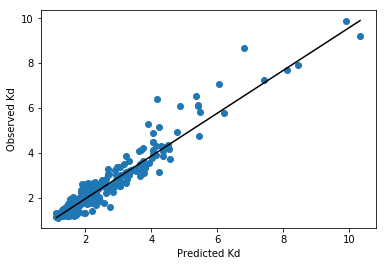

In [32]:
plt.scatter(P,R['PAR_Kd'])
plt.plot([P.min(),P.max()],[R['PAR_Kd'].min(), R['PAR_Kd'].max()], c='black')
plt.xlabel('Predicted Kd')
plt.ylabel('Observed Kd')

In [33]:
import statsmodels.api as sm

model11 = sm.OLS(y, sm.add_constant(X)).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PAR_Kd   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     582.2
Date:                Mon, 06 Aug 2018   Prob (F-statistic):          6.56e-138
Time:                        23:06:18   Log-Likelihood:                -135.24
No. Observations:                 263   AIC:                             282.5
Df Residuals:                     257   BIC:                             303.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3161      0.116      2.723      0.007       0.087       0.545
fDOM            -0.0023      0.001     -1.875      0.062      -0.005       0.000
chlorophyll      0.1054      0.015      6.818      0.000       0.075       0.136
turbidity        0.0819      0.005     17.868      0.000       0.073       0.091
waveHs           1.2005      0.453      2.653      0.008       0.309       2.092
currentSpeed     2.9037      1.011      2.873      0.004       0.914       4.894
==============================================================================
Omnibus:                       76.623   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.355
Skew:                           1.092   Prob(JB):                     3.41e-79
Kurtosis:                       8.311   Cond. No.                     3.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regressing under "typical" conditions:

In [38]:
R=CS01[CS01['waveHs'] < 0.29 ][['fDOM','chlorophyll','turbidity','waveHs','currentSpeed',
                                'PAR_Kd']].dropna()
X=R[['fDOM','chlorophyll','turbidity','waveHs','currentSpeed']]
y=R[['PAR_Kd']]

model01 = sm.OLS(y, sm.add_constant(X)).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PAR_Kd   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     236.5
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           2.72e-85
Time:                        23:12:47   Log-Likelihood:                -38.998
No. Observations:                 221   AIC:                             90.00
Df Residuals:                     215   BIC:                             110.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7232      0.098      7.415      0.000       0.531       0.915
fDOM            -0.0031      0.001     -3.353      0.001      -0.005      -0.001
chlorophyll      0.1056      0.013      8.266      0.000       0.080       0.131
turbidity        0.0754      0.006     12.490      0.000       0.064       0.087
waveHs           0.9606      0.410      2.345      0.020       0.153       1.768
currentSpeed    -0.1695      0.899     -0.189      0.851      -1.941       1.602
==============================================================================
Omnibus:                       50.574   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.510
Skew:                           0.758   Prob(JB):                     5.42e-56
Kurtosis:                       8.034   Cond. No.                     4.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""